In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 


In [2]:
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data1 = pd.read_excel(current_path + file)

In [3]:
#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data1.iloc[2:-13]

#Columns containing Tenure months for the GM, Chef, Sales, Office Managers (some missing values)
TenureMonth = data2.iloc[:,[6,8,10,12]]

# dataX will be just the Questionare answers
dataX = data2.iloc[:,13:]

# dataY will be just the occupany column
dataY = data2.iloc[:,3]

#LocationCode will contain the column for the location code
LocationCode = data2.iloc[:,2]

# TurnOver will be contain the turn over rate
TurnOver = data2.iloc[:,4]

In [4]:
#Change the data type to float (from object).
dataY2=(pd.to_numeric(dataY, errors='coerce'))

LocationCode2=(pd.to_numeric(LocationCode, errors='coerce'))

TurnOver2=(pd.to_numeric(TurnOver, errors='coerce'))

In [5]:
#Change the data type to float for the Employee Answers
dataX2 = pd.DataFrame().reindex_like(dataX)

#Try to run a for loop to change each column to float type
for index in range(dataX.shape[1]):
   
   # Select column by index position using iloc[]
    dataX2.iloc[:,index] = (pd.to_numeric(dataX.iloc[:,index], errors='coerce'))


In [6]:
#Do the same for the Tenure data frame.
TenureMonth2 = pd.DataFrame().reindex_like(TenureMonth)

#Try to run a for loop to change each column to float type
for column in range(TenureMonth.shape[1]):
   
   # Select column by index position using iloc[]
    TenureMonth2.iloc[:,column] = (pd.to_numeric(TenureMonth.iloc[:,column], errors='coerce'))

In [7]:
# Read csv for the median income 
file = '/datasets/ActivatedInsights/ACS175YRS1903.csv'
IncomeData = pd.read_csv(current_path + file, header=1)

In [8]:
# Read the sheet for the location code to zip code mapping
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx' #slash was wrong fixed to the correct back slash
CodeToZip = pd.read_excel(current_path + file, sheet_name = 5, header = 1)

In [9]:
#Convert to the integer?
#make the CotdeToZipNumeric the same size
CodeToZipNumeric = pd.DataFrame().reindex_like(CodeToZip)

#Try to run a for loop to change each column to float type
for index in range(CodeToZip.shape[1]):
   
   # Select column by index position using iloc[]
    CodeToZipNumeric.iloc[:,index] = (pd.to_numeric(CodeToZip.iloc[:,index], errors='coerce'))



In [10]:
#Rename the column for the mdian income
IncomeData.rename(columns={'Median income (dollars); Estimate; Households': 'MedianIncome'}, inplace=True)

#GO through all the location data and make an array that contains the median income.

#First reset the index of the LocationCode
LocationCode3=LocationCode2.reset_index(drop=True)

#make a new series with same shape as LocationCode. This will contain Median Income Data
#MedianIncomeData = pd.DataFrame().reindex_like(dataY3)
RowIndex1=range(LocationCode3.shape[0])
MedianIncomeData = pd.DataFrame(columns=['MedianIncomeForZip'], index=RowIndex1)
 
#for loop to get the Median income for each location's zip code.
for row in range(LocationCode3.shape[0]):
    
    ZipCode=CodeToZip.loc[CodeToZip['Code'] == LocationCode3[row],:]
    #Zip Code actually is a big list of all the rows that had the location code.
    #They should all point to the same zip code (in the second column) so chose the top one.
    ZipCodeSelect=ZipCode.iloc[0,1]
    
    #Get the value for the median income corresponding to the ZipCodeSelect
    MedianIncomeValue1 = IncomeData.loc[ IncomeData['Id2'] == ZipCodeSelect , 'MedianIncome' ]
    #make it numeric
    MedianIncomeValue2=pd.to_numeric(MedianIncomeValue1, errors='coerce')
    #need to figure out why I need to specify the value instead of the index-value pair
    MedianIncomeData.iloc[row]=MedianIncomeValue2.iloc[0]
   
   
    # Select column by index position using iloc[]
   # dataX3.iloc[:,index] = (pd.to_numeric(data2.iloc[:,index], errors='coerce'))

In [11]:
TenureMonth2.describe()
#we notice that there are some missing values. It's probably best to take the median and replace with it.

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
count,250.000000,238.000000,245.000000,241.000000
mean,32.404000,54.441176,23.118367,33.004149
std,32.775505,62.580671,24.281104,34.692038
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,10.000000,5.000000,9.000000
50%,16.000000,30.000000,13.000000,19.000000
75%,53.750000,78.750000,37.000000,46.000000
max,147.000000,325.000000,113.000000,210.000000


In [12]:
#Check where the missing values are.
TenureMonth2.loc[(TenureMonth2['Unnamed: 6'].isnull()) |
              (TenureMonth2['Unnamed: 8'].isnull()) |
              (TenureMonth2['Unnamed: 10'].isnull()) |
              (TenureMonth2['Unnamed: 12'].isnull())]

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
6,13.0,36.0,66.0,NaN
31,14.0,80.0,7.0,NaN
35,138.0,NaN,14.0,12.0
41,34.0,29.0,37.0,NaN
43,61.0,21.0,NaN,7.0
46,24.0,137.0,0.0,NaN
49,79.0,127.0,NaN,13.0
51,92.0,12.0,NaN,32.0
53,49.0,10.0,NaN,43.0
54,0.0,NaN,4.0,27.0


In [13]:
#Replace the missing data for Tenure of GM with median values.
MedianTenureGM = TenureMonth2.loc[:,'Unnamed: 6'].median()

TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 6'].isnull())] = MedianTenureGM

In [14]:
#Replace the chef, sales leader, and office manager's missing tenure with their median
MedianTenureChef = TenureMonth2.loc[:,'Unnamed: 8'].median()
MedianTenureSales = TenureMonth2.loc[:,'Unnamed: 10'].median()
MedianTenureOffice = TenureMonth2.loc[:,'Unnamed: 12'].median()


TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 8'].isnull())] = MedianTenureChef
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 10'].isnull())] = MedianTenureSales
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 12'].isnull())] = MedianTenureOffice

''

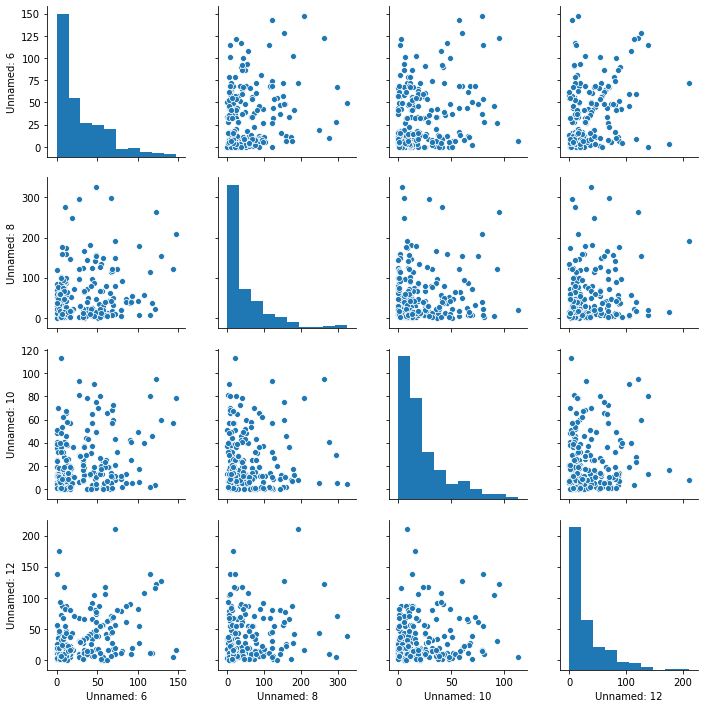

In [15]:
#Tenure monthes are extrenely poistively skewed. May be log (x+1) transform?
sb.pairplot(TenureMonth2)
;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd638a61e10>]],
      dtype=object)

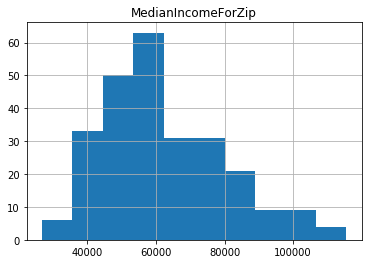

In [16]:
#Median income is also poistively skewed.
MedianIncomeData.hist()

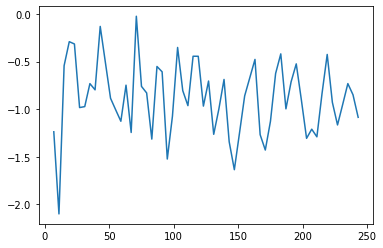

In [17]:
#Employee response featres are all negatively skewed.
skewValue = dataX2.skew(axis=0)
sb.lineplot(data=skewValue)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd63a17fa58>,
      dtype=object)

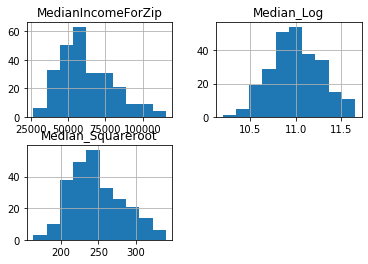

In [18]:
#MedianIncomeData is positively skewed.
#Apply sqrt
MedianIncomeData['Median_Squareroot']=MedianIncomeData['MedianIncomeForZip']**(1/2)
#Take log
MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip'])
MedianIncomeData.hist()

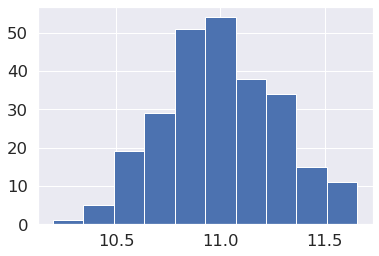

In [19]:
#Save the hisogram for the log transformed median income.
sb.set(font_scale=1.5)
sns_plot = MedianIncomeData.iloc[:,2].hist()
sns_plot.figure.savefig("MedianIncomeLog.png")

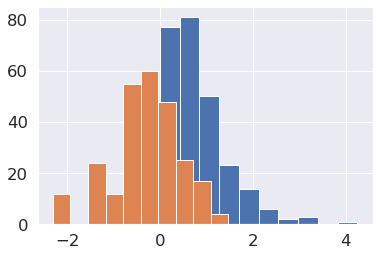

In [20]:
#Start transforming the data
#For the room occupancy number and turnover we check below, looks like the Turnover should be at least log transformed.
#Also add 0.1 because we don't want the zero turnover.
TurnOver2.hist()
LogTurnover=np.log(TurnOver2+0.1)
LogTurnover.hist()

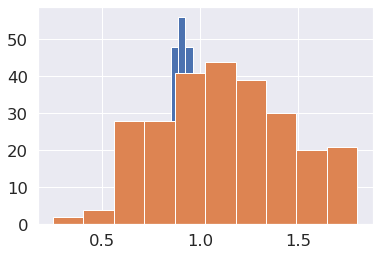

In [21]:
#For room occupancy.
dataY2.hist()
#it's negatively skewed so flip, take log, then flip back.
dataY2Flip=1.1-dataY2
dataY2Log=np.log(dataY2Flip)
OccupancyLogFlip=-0.5-dataY2Log
OccupancyLogFlip.hist()

In [22]:
#For the DataX, because they are mostly negative, flip it by subtracting it from 1.1 and then use log transform.
#After that flip back again by subtracting it from another value.
NewDataX2=1.1-dataX2
NewDataX2Log=NewDataX2.apply(np.log) # returns DataFrame
NewDataX2LogFlip=0.1-NewDataX2Log


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6380a03c8>,
      dtype=object)

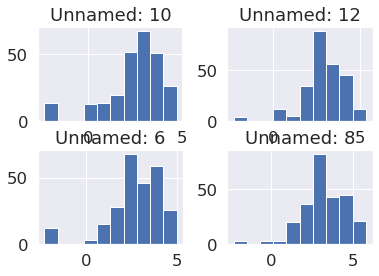

In [23]:
#We need to log transform the TenureMonth3, but add 0.1 so that we don't have to deal with the log of zero.
NewTenureMonth2=TenureMonth2+0.1
NewTenureMonth2Log=NewTenureMonth2.apply(np.log) # returns DataFrame
NewTenureMonth2Log.hist()

In [24]:
#Now we have more or less normally distributed input variables.
#We have NewDataX3LogFlip for the employee response
#We have LogTurnover for the turnover rate.
#We have OccupancyLogFlip for the occupancy.
#We have MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip']) for Median Income Data
#We have NewTenureMonth3Log

#Standarize
scalerEmployeeResponse = pp.StandardScaler().fit(NewDataX2LogFlip)
EmployeeResponse = scalerEmployeeResponse.transform(NewDataX2LogFlip)
EmployeeResponseDF=pd.DataFrame(data=EmployeeResponse)

scalerMedianIncomeData = pp.StandardScaler().fit(MedianIncomeData)
MedianIncomeDataS = scalerMedianIncomeData.transform(MedianIncomeData)
MedianIncomeDataSDF=pd.DataFrame(data=MedianIncomeDataS)

scalerTenureMonth = pp.StandardScaler().fit(NewTenureMonth2Log)
TenureMonthS = scalerTenureMonth.transform(NewTenureMonth2Log)
TenureMonthSDF=pd.DataFrame(data=TenureMonthS)

OccupancyTurnover=pd.concat([OccupancyLogFlip, LogTurnover], axis=1)

scalerOccupancyTurnover = pp.StandardScaler().fit(OccupancyTurnover)
OccupancyTurnoverS = scalerOccupancyTurnover.transform(OccupancyTurnover)
OccupancyTurnoverSDF=pd.DataFrame(data=OccupancyTurnoverS)



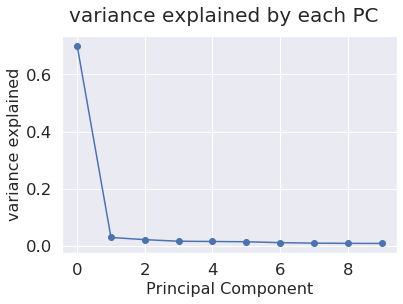

In [25]:
#Because we have 60 columns for Employee response, we will take the PCA for this one and reduce the dimension
#Then first try linear regression, then perhaps logit regression or other regressions.

#Looks like we finally have them in a format we can use
    
#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pca1=PCA(n_components=10)
pca1.fit(EmployeeResponseDF)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pca1.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCA1=pca1.transform(EmployeeResponseDF)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.


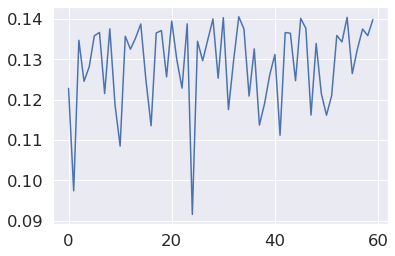

In [26]:
#Get the weights of each feature in PC1
ComponentWeight = pd.DataFrame(pca1.components_)
sb.lineplot(data=ComponentWeight.iloc[0,:])

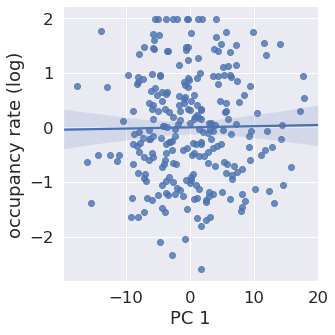

In [27]:

#Put together into a single data frame so we can plot easier
frameOccupancy = { 'occupancy rate (log)': OccupancyTurnoverSDF.iloc[:,0], 'PC 1': DataArrayPCA1[:,0] } 
dataForPlotOccupancy = pd.DataFrame(frameOccupancy)
sb.lmplot(x='PC 1', y='occupancy rate (log)', data=dataForPlotOccupancy)


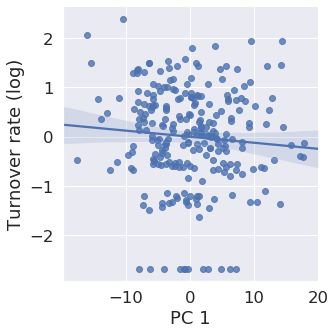

In [28]:
#Put together into a single data frame so we can plot easier
frameTurnover = { 'Turnover rate (log)': OccupancyTurnoverSDF.iloc[:,1], 'PC 1': DataArrayPCA1[:,0] } 
dataForPlotTurnover = pd.DataFrame(frameTurnover)
sb.lmplot(x='PC 1', y='Turnover rate (log)', data=dataForPlotTurnover)

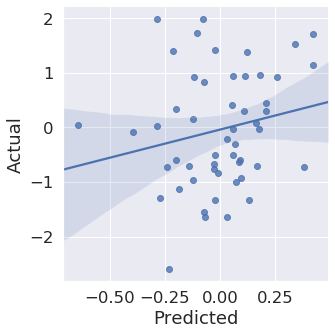

In [29]:
#put together all the features and run the multivariate linear regression model.
PCA_DF=pd.DataFrame(data=DataArrayPCA1)

Features = pd.concat([PCA_DF.iloc[:,0], MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)

target=OccupancyTurnoverSDF.iloc[:,0]
target2 = OccupancyTurnoverSDF.iloc[:,1]



#Specify the features and a target (Occupancy)
x = Features
y = target

#Split it 80 - 20 for now

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train) #training the algorithm

Y_pred = lm.predict(X_test)

ActualPrediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction)


In [30]:
#Check the coefficients.
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.005372
2,0.092195
0,0.099433
1,0.105921
2,0.133581
3,0.024778


In [31]:
lm.score(x,y)


0.049927266928759484

In [32]:
#May be we are supposed to use this instead of the above?
r2_score(Y_test, Y_pred)

0.03816793322463441

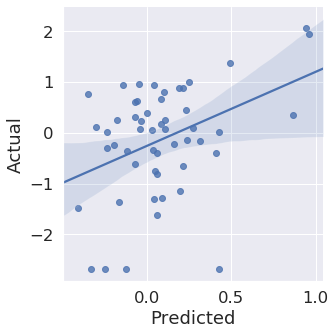

In [33]:
#Specify the features and a target (turnover)
x2 = Features
y2 = target2

#Split it 80 - 20 for now

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, Y2_train) #training the algorithm

Y2_pred = lm2.predict(X2_test)

ActualPrediction2 = pd.DataFrame({'Actual': Y2_test, 'Predicted': Y2_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction2)

In [34]:
lm2.score(x2,y2)


0.07508419114825338

In [35]:
#May be we are supposed to use this instead of the above?
r2_score(Y2_test, Y2_pred)

0.09890655150645089

In [36]:
#Check the coefficients.
coeff_df = pd.DataFrame(lm2.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.003435
2,0.036047
0,-0.006682
1,-0.178530
2,-0.046720
3,-0.141728


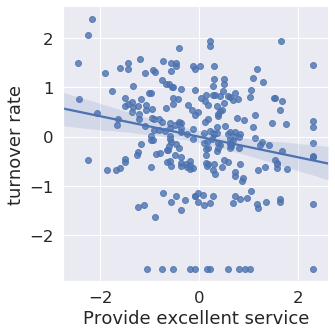

In [42]:
#Still doesn't look that great. For sanity check let's plot what the answer to one question looks like
#Question number for "Do you intend to stay long term" is 47 (starting with 0)
#Actually 55 "do you think you make a difference" is better predictor.
#Get the employee turn over rate and plot that against the PC1.
#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': target2, 'Provide excellent service': EmployeeResponseDF.iloc[:,55] } 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Provide excellent service', y='turnover rate', data=dataForPlotMVP)




In [44]:


#Try to take away turn over rate that is lower than -2.
SelectedResponse=EmployeeResponseDF.loc[target2>-2,55]
SelectedTarget=target2.loc[target2>-2]


pearsonr(EmployeeResponseDF.iloc[:,55], target2)

(-0.20808348600528925, 0.0007896874131314261)

In [45]:
pearsonr(SelectedResponse, SelectedTarget)

(-0.21555767608491158, 0.0006818463289446692)

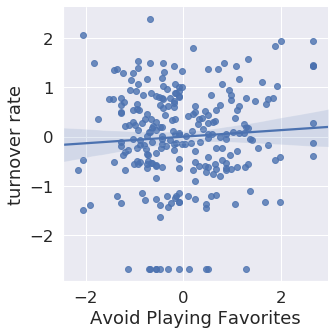

In [46]:
frameMVP = { 'turnover rate': target2, 'Avoid Playing Favorites': EmployeeResponseDF.iloc[:,21] } 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Avoid Playing Favorites', y='turnover rate', data=dataForPlotMVP)



In [47]:
pearsonr(EmployeeResponseDF.iloc[:,21], target2)

(0.06655395170642504, 0.2878187344202886)

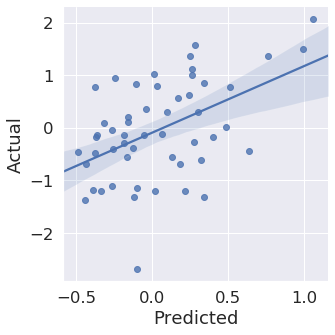

In [74]:
#Specify the features and a target (turnover)
Features2 = pd.concat([EmployeeResponseDF.iloc[:,55], MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


x3 = Features2
y3 = target2

#Split it 80 - 20 for now

X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size=0.2, random_state=10)
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train, Y3_train) #training the algorithm

Y3_pred = lm3.predict(X3_test)

ActualPrediction3 = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction3)

In [39]:
lm3.score(x3,y3)

0.10426495927839696

In [75]:
#May be we are supposed to use this instead of the above?
r2_score(Y3_test, Y3_pred)

0.21882730853805088

In [41]:
coeff_df = pd.DataFrame(lm3.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.118953
2,0.025637
0,0.017573
1,-0.175730
2,-0.043323
3,-0.152154


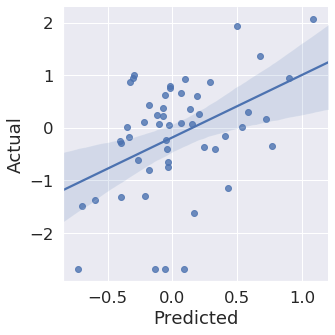

In [42]:
#Try random forrest regression. Use the best one above and try to predict the turn over rate.
#For here we still use one time point.

x4 = Features2
y4 = target2

#Split it 80 - 20 for now

X4_train, X4_test, Y4_train, Y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X4_train, Y4_train);

# Use the forest's predict method on the test data
predictions = rf.predict(X4_test)

ActualPrediction4 = pd.DataFrame({'Actual': Y4_test, 'Predicted': predictions})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction4)

In [43]:
#Very high prediction! But was the info on the Employee response used?
rf.score(x4,y4)


0.6997602915172796

In [44]:
#May be we are supposed to use this instead of the above?
r2_score(Y4_test, predictions)

0.15188148471194585

In [45]:
#Or use this? This is probably the test score.
rf.score(X4_test,Y4_test)
#This is the same number as above. Probably 

0.15188148471194585

In [46]:
#This is probably the training score. We over fit?
rf.score(X4_train, Y4_train)

0.8667193270976081

In [47]:
rf.feature_importances_

array([0.1824156 , 0.2064885 , 0.14508815, 0.15901526, 0.1462377 ,
       0.16075478])

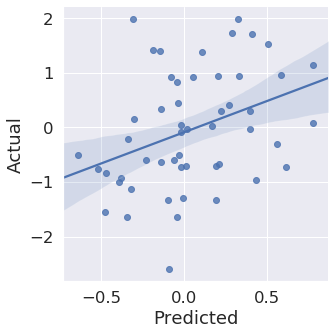

In [48]:
#Try random forrest regression. Use the best one above and try to predict the occupancy rate now.
#For here we still use one time point.

x5 = Features2
y5 = target

#Split it 80 - 20 for now

X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5, y5, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf2.fit(X5_train, Y5_train);

# Use the forest's predict method on the test data
predictions2 = rf2.predict(X5_test)

ActualPrediction5 = pd.DataFrame({'Actual': Y5_test, 'Predicted': predictions2})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction5)

In [49]:
rf2.score(x5, y5)

0.6977526403706217

In [50]:
#May be we are supposed to use this instead of the above?
r2_score(Y5_test, predictions2)

0.12302157086588428

In [51]:
#Or use this? This is probably the test score.
rf2.score(X5_test,Y5_test)
#This is the same number as above. Probably 

0.12302157086588428

In [52]:
rf2.feature_importances_

array([0.15967769, 0.20878583, 0.13769757, 0.16958579, 0.20910721,
       0.1151459 ])

In [53]:
#Try visualizing one of the trees for the first random forrest (predicing the turn over rate)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

#get the names of columns (currently not descriptive)
# Saving feature names for later use
feature_list = list(Features2.columns)

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

#It's a very complex tree.

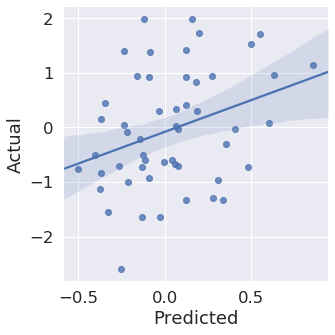

In [54]:
#See if the PC 1 can be a good predictor if we use it in a random forrest model.
#Try random forrest regression. Use the best one above and try to predict the occupancy rate now.
#For here we still use one time point.

x6 = Features
y6 = target

#Split it 80 - 20 for now

X6_train, X6_test, Y6_train, Y6_test = train_test_split(x6, y6, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf3.fit(X6_train, Y6_train);

# Use the forest's predict method on the test data
predictions3 = rf3.predict(X6_test)

ActualPrediction6 = pd.DataFrame({'Actual': Y6_test, 'Predicted': predictions3})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction6)

In [55]:
rf3.score(X6_test,Y6_test)


0.10031393742286789

In [56]:
rf3.feature_importances_

array([0.16213254, 0.2069831 , 0.13844584, 0.16710975, 0.21016058,
       0.1151682 ])

r^2 on test data : 0.065849
With Lasso's score function: 0.065849


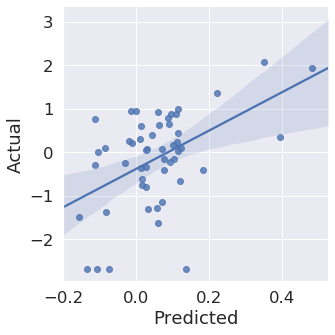

In [57]:
#Now try lasso with all the featueres and see which one is left
#Specify the features and a target (turnover)
Features3 = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


x7 = Features3
y7 = target2 #Turn over

#Split it 80 - 20 for now

X7_train, X7_test, Y7_train, Y7_test = train_test_split(x7, y7, test_size=0.2, random_state=0)

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X7_train, Y7_train)

YpredLasso = lasso1.predict(X7_test)
r2ScoreLasso = r2_score(Y7_test, YpredLasso)
print("r^2 on test data : %f" % r2ScoreLasso)
r2ScoreLasso1=lasso1.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso1)
coeff_used = np.sum(lasso1.coef_!=0)

ActualPrediction7 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction7)

In [58]:
coeff_used

5

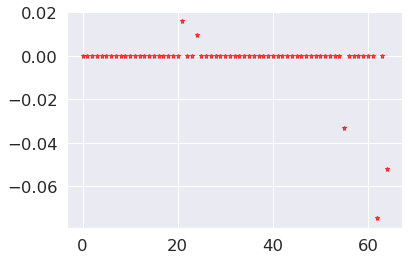

In [59]:
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.1$',zorder=7) 

r^2 on test data : -0.106288
With Lasso's score function: -0.106288


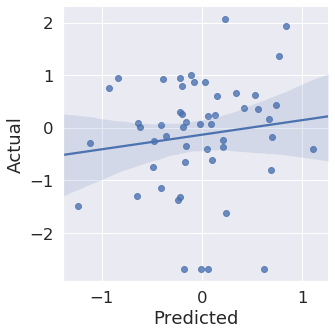

In [60]:
#Try the same but with alpha = 0.01
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X7_train, Y7_train)

YpredLasso2 = lasso2.predict(X7_test)
r2ScoreLasso2 = r2_score(Y7_test, YpredLasso2)
print("r^2 on test data : %f" % r2ScoreLasso2)
r2ScoreLasso21=lasso2.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso21)
coeff_used = np.sum(lasso2.coef_!=0)

ActualPrediction8 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso2})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction8)

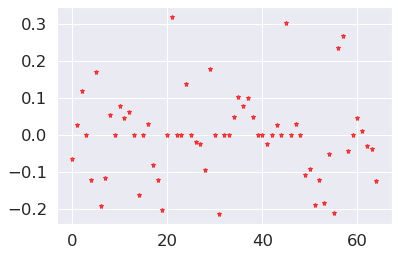

In [61]:
plt.plot(lasso2.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) 

r^2 on test data : 0.126562
With Lasso's score function: 0.126562


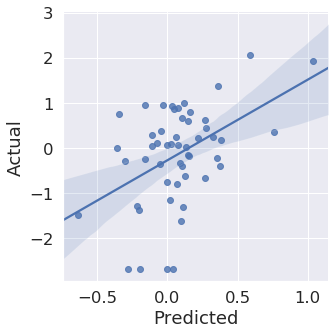

In [62]:
#Try the same but with alpha = 0.05
lasso3 = Lasso(alpha=0.05)
lasso3.fit(X7_train, Y7_train)

YpredLasso3 = lasso3.predict(X7_test)
r2ScoreLasso3 = r2_score(Y7_test, YpredLasso3)
print("r^2 on test data : %f" % r2ScoreLasso3)
r2ScoreLasso31=lasso3.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso31)
coeff_used = np.sum(lasso3.coef_!=0)

ActualPrediction9 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso3})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction9)

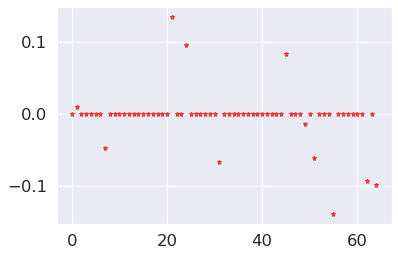

In [63]:
plt.plot(lasso3.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 

In [64]:
#Features3 = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)
#target2 is turn over rate
#Save in pkl format.
Features3.to_pickle("./Features3.pkl")
target2.to_pickle("./target2.pkl")


r^2 on test data : 0.065849
With Lasso's score function: 0.065849


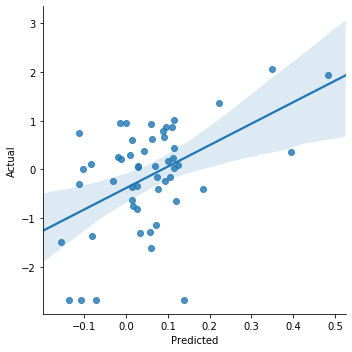

In [3]:
#Try reloading and running the analysis.
Features3 = pd.read_pickle("./Features3.pkl")
target2 = pd.read_pickle("./target2.pkl")

x7 = Features3
y7 = target2 #Turn over

#Split it 80 - 20 for now

X7_train, X7_test, Y7_train, Y7_test = train_test_split(x7, y7, test_size=0.2, random_state=0)

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X7_train, Y7_train)

YpredLasso = lasso1.predict(X7_test)
r2ScoreLasso = r2_score(Y7_test, YpredLasso)
print("r^2 on test data : %f" % r2ScoreLasso)
r2ScoreLasso1=lasso1.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso1)
coeff_used = np.sum(lasso1.coef_!=0)

ActualPrediction7 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction7)

r^2 on test data : 0.102020


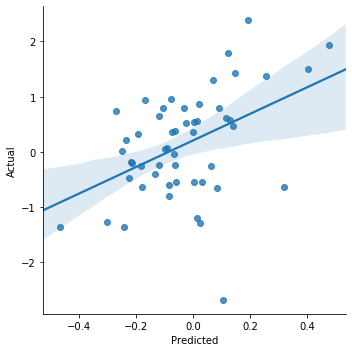

In [11]:
from sklearn.linear_model import LassoCV

#Try reloading and running the analysis. This time with lasso CV to use cross validation
Features3 = pd.read_pickle("./Features3.pkl")
target2 = pd.read_pickle("./target2.pkl")

xCV = Features3
yCV = target2 #Turn over

#Split it 80 - 20 for now

XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

reg = LassoCV(cv=5).fit(XCV_train, YCV_train)

YpredLassoCV = reg.predict(XCV_test)
r2ScoreLassoCV = r2_score(YCV_test, YpredLassoCV)
print("r^2 on test data : %f" % r2ScoreLassoCV)

ActualPredictionCV = pd.DataFrame({'Actual': YCV_test, 'Predicted': YpredLassoCV})

sb.lmplot(x='Predicted', y='Actual', data=ActualPredictionCV)

In [6]:
reg.alpha_

0.06571904651817104

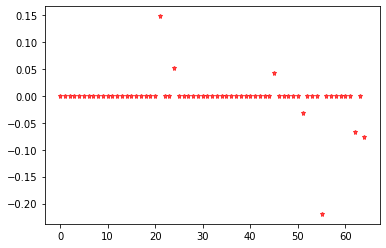

In [7]:
plt.plot(reg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 

r^2 on test data : 0.130556


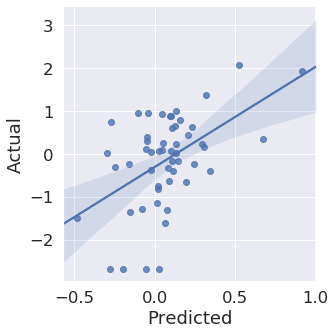

In [66]:
#Try the same but with alpha = 0.062
lasso4 = Lasso(alpha=0.062)
lasso4.fit(X7_train, Y7_train)

YpredLasso4 = lasso4.predict(X7_test)
r2ScoreLasso4 = r2_score(Y7_test, YpredLasso4)
print("r^2 on test data : %f" % r2ScoreLasso4)
#r2ScoreLasso31=lasso3.score(X7_test, Y7_test)
#print("With Lasso's score function: %f" % r2ScoreLasso31)
coeff_used = np.sum(lasso3.coef_!=0)

ActualPrediction10 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso4})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction10)

In [67]:
index=np.argsort(abs(lasso4.coef_))
index


array([ 0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 63, 46, 48, 49,
       50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 47, 30, 32, 28,  1,  2,  3,
        4,  5,  6,  8,  9, 10, 11, 12, 29, 14, 13, 16, 17, 18, 19, 20, 27,
       26, 22, 15, 25, 23,  7, 45, 51, 31, 24, 64, 62, 21, 55])

In [68]:
lasso4.coef_[24]

0.07366283026646682

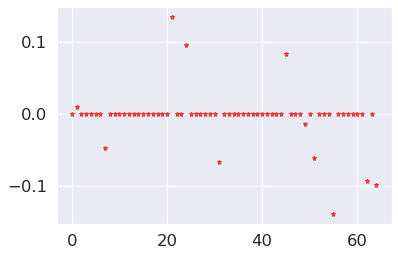

In [69]:
plt.plot(lasso3.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 